# The mass-sheet-degeneracy

As explained, the mass-sheet-degeneracy is a fundamental degeneracy of gravitational lensing.  

Many lensing observables are unchanged when

* we substitute the lensing potential 
$$
\Psi(\vec x) \rightarrow \Psi'(x)=\frac{1-\lambda}{2}x^2+\lambda\Psi(\vec x) \;,
$$
* we scale the lengths on the source plane by $\lambda$, i.e. $y'=\lambda y$.

These lensing observables are 

* the positions of the multiple images
* the location of the critical lines
* the reduced shear
* the flux ratios

The transformation of the potential is called ***Mass Sheet Transformation***. 

In the examples below we illustrate the effects of a MST assuming $\lambda=0.1$. This is a quite extreme MST. Values of $\lambda$ closer to unity produce much smaller effects than outlined below.

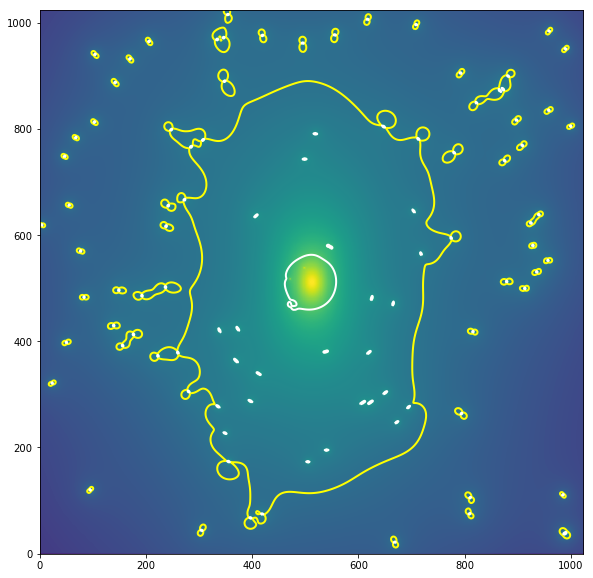

In [2]:
from mynewdeflector import *
from matplotlib.colors import LogNorm, PowerNorm, SymLogNorm
%matplotlib inline
"""
Main lens:
"""
kwargs={'theta_c': 5.0, 'norm': 30.0, 'ell': 0.2}
size=200.0
npix=1024.0
main_lens=psie(size=size,npix=npix,**kwargs)

"""
substructures
"""
n_pert=100

xsub=(np.random.random_sample(n_pert)-0.5)*size
ysub=(np.random.random_sample(n_pert)-0.5)*size

fsub=np.random.random_sample(n_pert)
pa=np.random.random_sample(n_pert)*2.0*np.pi

pot=main_lens.pot
for i in range(n_pert):
    kwargs={'theta_c': 0.0, 'norm': 0.5, 'ell': 0.0, 'pa': pa[i]}
    sub_lens=psie(x0=xsub[i],y0=ysub[i],size=size,npix=npix,**kwargs)
    pot=pot+sub_lens.pot

"""
Now we have a quite complex potential to work with, and we use it to
create a deflector
"""
df=deflector_from_potential(pot=pot,size=size,npix=npix)

"""
... and to plot some lens properties!
"""

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df.convergence(),origin='low',norm=LogNorm())
g1,g2=df.shear()
lambdat=1.0-df.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

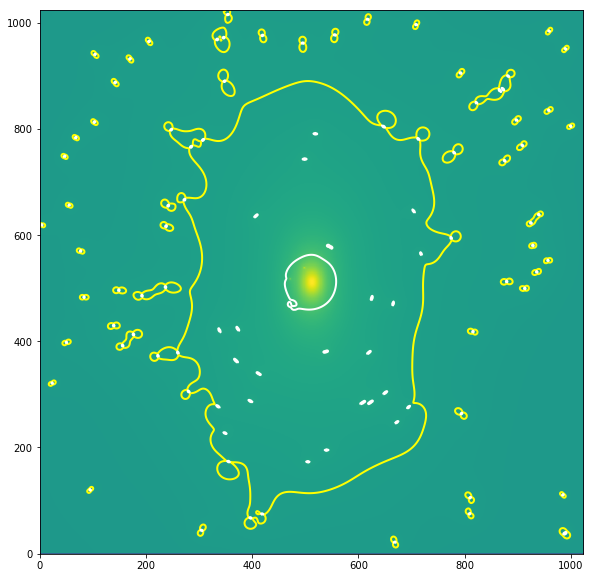

In [40]:
"""
now we try to apply a MS transformation to the potential
"""
lmd=0.1
pc=np.linspace(-size/2.0,size/2.0,npix)
x1,x2=np.meshgrid(pc,pc)
pot_lmd=(1.0-lmd)/2.0*(x1**2+x2**2)+pot*lmd
df_lmd=deflector_from_potential(pot=pot_lmd,size=size,npix=npix)

"""
... and remake the same plot!
"""

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.imshow(df_lmd.convergence(),origin='low',norm=LogNorm())
g1,g2=df_lmd.shear()
lambdat=1.0-df_lmd.convergence()-np.sqrt(g1*g1+g2*g2)
lambdar=1.0-df_lmd.convergence()+np.sqrt(g1*g1+g2*g2)
cst=ax.contour(lambdat,levels=[0.0],colors='yellow',linewidths=2)
ax.imshow(lambdar,origin='low',alpha=0)
csr=ax.contour(lambdar,levels=[0.0],colors='white',linewidths=2)

Although the convergece is now different, being

$$
\kappa'=(1-\lambda)+\lambda\kappa
$$ 

The critical lines are exactly as before.

Now, we try to play with a couple of sources:

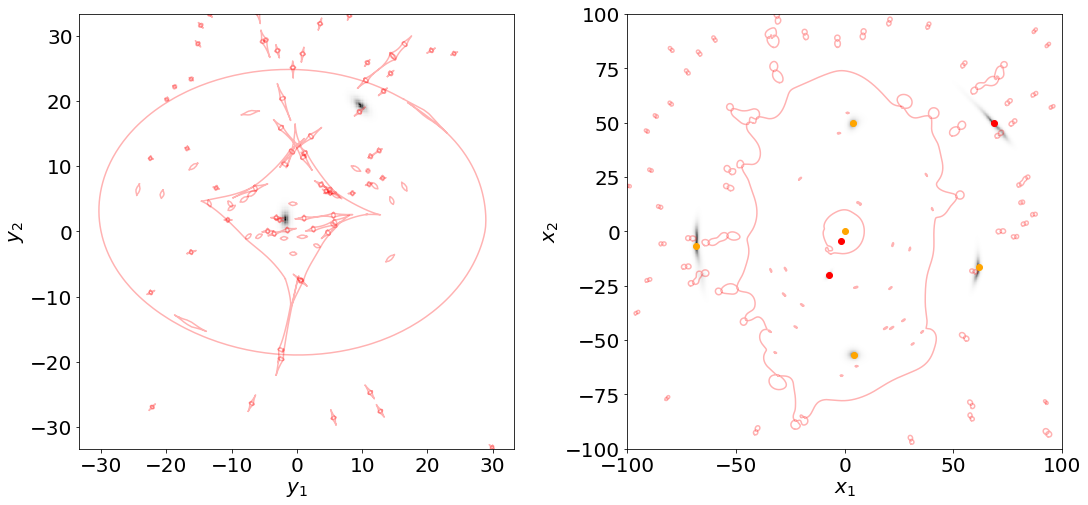

In [41]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

df.clines(ax=ax[1],alpha=0.3)
df.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

#source number 1: a sersic source with re=1.0 at some location
kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -1.7, 'ys2': 1.9}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)
xi1,xi2=df.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=se.image
image_unlensed=se_unlensed.image

#source number 2: another sersic source with re=1.0 at some other location
kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi/4, 'n': 1,'ys1': 9.8, 'ys2': 19.4}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df,**kwargs)
xe1,xe2=df.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
ax[1].plot(xe1,xe2,'o',color='red')
ax[1].plot(xi1,xi2,'o',color='orange')
y1,y2=df.map_back(xi1,xi2)

While with the MS transformation:

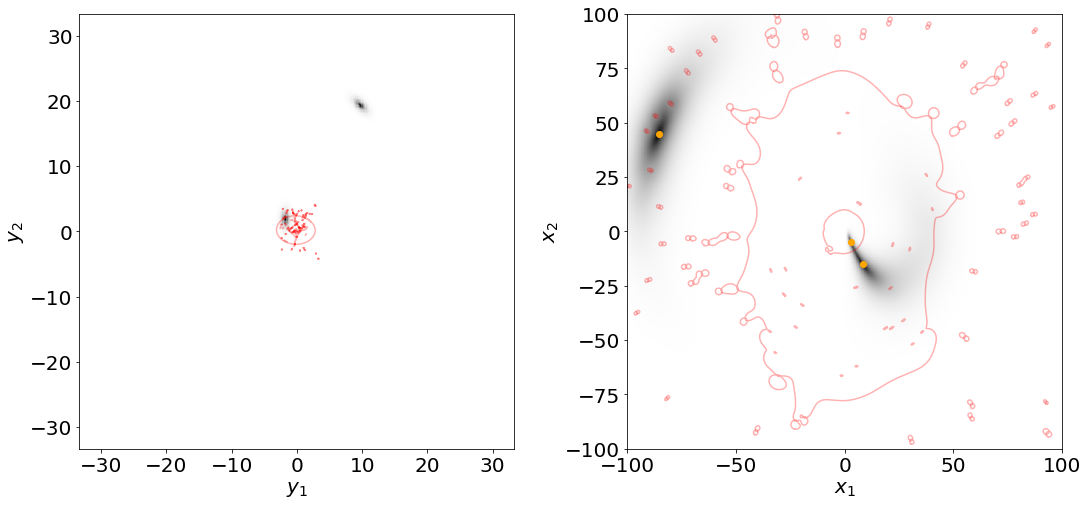

In [42]:
fig,ax=plt.subplots(1,2,figsize=(18,8))
#main_lens.clines(ax=ax[0])
#main_lens.caustics(lt='--',ax=ax[1],color='blue')


df_lmd.clines(ax=ax[1],alpha=0.3)
#ax[0].contour(main_lens.detA(),linestyles='dashed',levels=[0.0],
#              extent=[-size/2.,size/2.,-size/2.,size/2.],
#            colors='blue')
df_lmd.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -1.7, 'ys2': 1.9}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df_lmd,**kwargs)
xi1,xi2=df_lmd.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=se.image
image_unlensed=se_unlensed.image

kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi/4, 'n': 1,'ys1': 9.8, 'ys2': 19.4}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df_lmd,**kwargs)
xe1,xe2=df_lmd.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
ax[1].plot(xe1,xe2,'o',color='red')
ax[1].plot(xi1,xi2,'o',color='orange')
y1,y2=df.map_back(xi1,xi2)

On the other hand, the result will be different if we rescale properly the source plane...

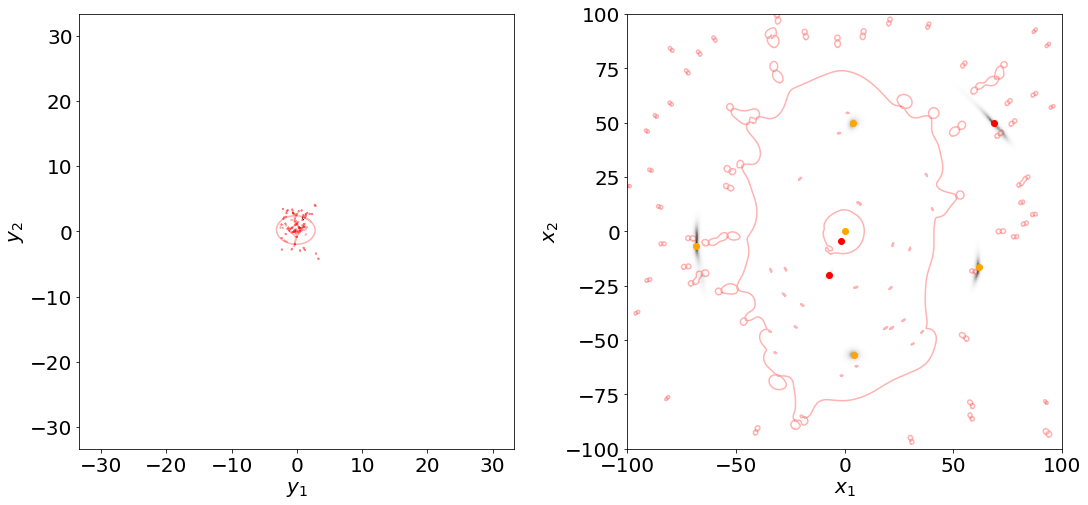

In [43]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

df_lmd.clines(ax=ax[1],alpha=0.3)
df_lmd.caustics(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/6.,size/6.])
ax[0].set_ylim([-size/6.,size/6.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$y_1$',fontsize=20)
ax[0].set_ylabel('$y_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')
    
kwargs={'q': 0.5,'re': 1.0*lmd, 'pa': np.pi, 'n': 1,'ys1': -1.7*lmd, 'ys2': 1.9*lmd}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df_lmd,**kwargs)
xi1,xi2=df_lmd.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=se.image
image_unlensed=se_unlensed.image

kwargs={'q': 0.5,'re': 1.0*lmd, 'pa': np.pi/4, 'n': 1,'ys1': 9.8*lmd, 'ys2': 19.4*lmd}
se_unlensed=sersic(size,npix,**kwargs)
se=sersic(size,npix,gl=df_lmd,**kwargs)
xe1,xe2=df_lmd.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=image_lensed+se.image
image_unlensed=image_unlensed+se_unlensed.image
ax[0].imshow(image_unlensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
ax[1].plot(xe1,xe2,'o',color='red')
ax[1].plot(xi1,xi2,'o',color='orange')
y1,y2=df.map_back(xi1,xi2)

... here we get back the same images as before! Notice that the lens magnification is much bigger now (because we chose $\lambda=0.1$). Indeed, 

$$
\mu'=\mu/\lambda^2
$$

# How can we break the MSD?

Let us assume that the two sources above are at different redshifts. Let say that the first source is at $z_S=2$, while the second is at $z_S=2.2$. We assume that the potential ```pot``` is normalized to the redshift of the first source. The second source "will see" a different potential. More precisely, this other potential will differ from the first by a factor 

$$
\Xi=\frac{D_{LS}(z_S=2)}{D_S(z_S=2)}\frac{D_{S}(z_S=2.2)}{D_{LS}(z_S=2.2)}
$$

To compute this potential, we need to specify a cosmological framework, which we choose to be a concordance $\Lambda$CDM model:

In [44]:
zl=0.5
zs1=2.0
zs2=2.2
from astropy.cosmology import FlatLambdaCDM
co = FlatLambdaCDM(H0=70, Om0=0.3)
dls_1=co.angular_diameter_distance_z1z2(zl,zs1)
ds_1=co.angular_diameter_distance(zs1)
dls_2=co.angular_diameter_distance_z1z2(zl,zs2)
ds_2=co.angular_diameter_distance(zs2)
xi=ds_2/dls_2*dls_1/ds_1

Using the original lens potential:

In [45]:
pot_2=pot*xi
df_2=deflector_from_potential(pot=pot_2,size=size,npix=npix)

and applying the MS transformation:

In [46]:
pot_lmd_2=pot_lmd*xi
df_lmd_2=deflector_from_potential(pot=pot_lmd_2,size=size,npix=npix)

Now we can compare how the images of the two sources would look like:

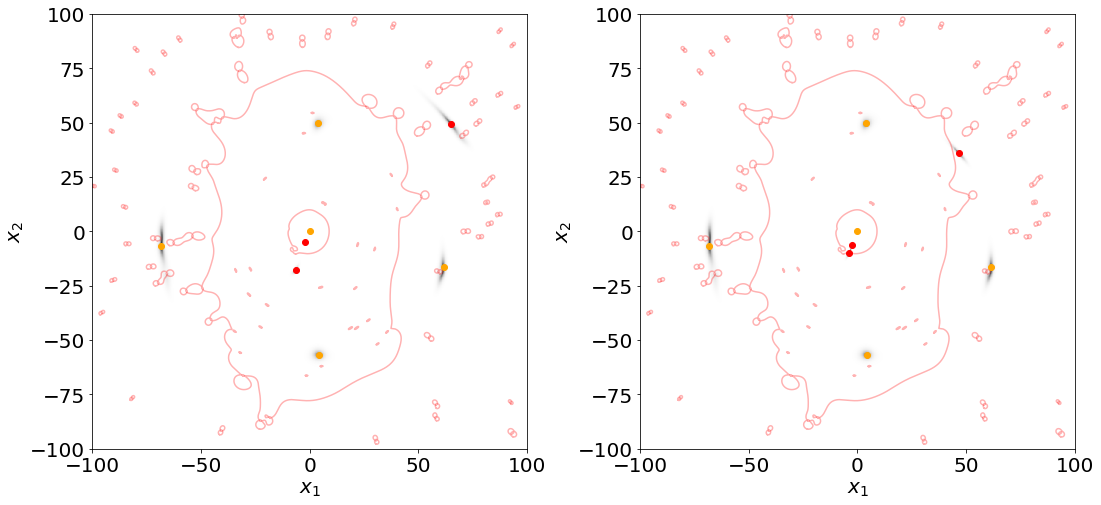

In [47]:
fig,ax=plt.subplots(1,2,figsize=(18,8))

df_lmd.clines(ax=ax[1],alpha=0.3)
df.clines(ax=ax[0],alpha=0.3)

        
ax[0].set_xlim([-size/2.,size/2.])
ax[0].set_ylim([-size/2.,size/2.])
ax[1].set_xlim([-size/2.,size/2.])
ax[1].set_ylim([-size/2.,size/2.])
                      
ax[1].set_xlabel('$x_1$',fontsize=20)
ax[1].set_ylabel('$x_2$',fontsize=20)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
for i in range(2):
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    ax[i].set_aspect('equal')

# no MST 
kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi, 'n': 1,'ys1': -1.7, 'ys2': 1.9}
se=sersic(size,npix,gl=df,**kwargs)
xi10,xi20=df.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed0=se.image

kwargs={'q': 0.5,'re': 1.0, 'pa': np.pi/4, 'n': 1,'ys1': 9.8, 'ys2': 19.4}
se=sersic(size,npix,gl=df_2,**kwargs)
xe10,xe20=df_2.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed0=image_lensed0+se.image
    
    
# with MST    
kwargs={'q': 0.5,'re': 1.0*lmd, 'pa': np.pi, 'n': 1,'ys1': -1.7*lmd, 'ys2': 1.9*lmd}
se=sersic(size,npix,gl=df_lmd,**kwargs)
xi1,xi2=df_lmd.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=se.image

kwargs={'q': 0.5,'re': 1.0*lmd, 'pa': np.pi/4, 'n': 1,'ys1': 9.8*lmd, 'ys2': 19.4*lmd}
se=sersic(size,npix,gl=df_lmd_2,**kwargs)
xe1,xe2=df_lmd_2.find_images(kwargs['ys1'],kwargs['ys2'])

image_lensed=image_lensed+se.image





ax[0].imshow(image_lensed0,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1)
ax[1].imshow(image_lensed,origin='lower',extent=[-se.size/2,se.size/2,-se.size/2,se.size/2],cmap='gray_r',zorder=1) 
ax[0].plot(xe10,xe20,'o',color='red')
ax[0].plot(xi10,xi20,'o',color='orange')
ax[1].plot(xe1,xe2,'o',color='red')
ax[1].plot(xi1,xi2,'o',color='orange')
y1,y2=df.map_back(xi1,xi2)

From this example, it becomes clear that fitting multiple images simultaneously can break the MSD: clearly, one could fit the source number 1 with a potential transformed according to a MST, but he'd fail to fit the second system of multiple images with this transformed potential.


*** WARNING: the examples above show quite extreme MSTs! ***


Another way to break the MSD is to choose the form of the density profile. Consider for example a SIS, whose convergence profile is $\kappa(x)=1/2x$. If we apply the MST, then

$$
\kappa'(x)=(1-\lambda)+\frac{\lambda}{2x}
$$



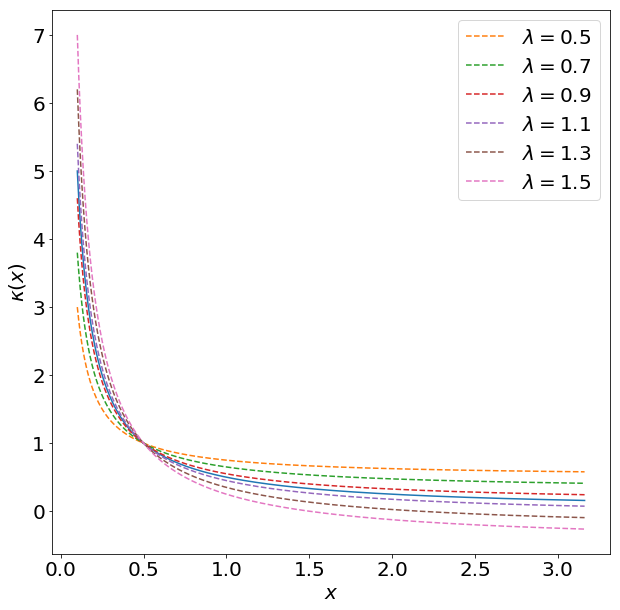

In [58]:
x=np.logspace(-1,0.5,1000)
l=np.linspace(0.5,1.5,6)

k=1.0/2.0/x

fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.plot(x,k,'-')
for i in range(len(l)):
    kp=l[i]/2.0/x+(1.0-l[i])
    ax.plot(x,kp,'--',label='$\lambda=$'+str(l[i]))
ax.set_ylabel('$\kappa(x)$',fontsize=20)
ax.set_xlabel('$x$',fontsize=20)
ax.xaxis.set_tick_params(labelsize=20)
ax.yaxis.set_tick_params(labelsize=20)
ax.legend(fontsize=20)

thus modifying the shape of the resulting profile. In this case, fitting with an SIS model would break the degeneracy. Unfortunately, we don't know a priori what is the profile of the lens!